In [2]:
import sklearn
import seaborn as sns
import pandas as pd
import math
import numpy as np
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA


from matplotlib import pyplot 
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import timedcall
from sklearn import datasets

%matplotlib inline

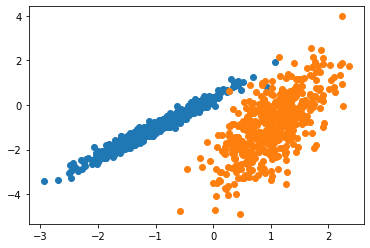

In [73]:
#define dataset
X,y= make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y==class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix,0],X[row_ix,1])
pyplot.show()    

# AffinityPropagation

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


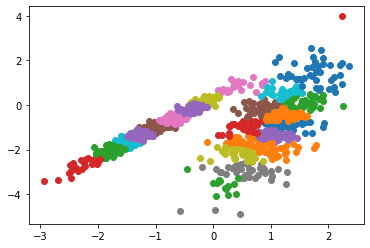

In [74]:
X,_ = make_classification(n_samples=1000, n_features = 2, n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=4)
model=AffinityPropagation(damping=0.9)
model.fit(X)
yhat =model.predict(X)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix,1])
pyplot.show()

# CLARANS Algorithm

In [75]:
iris = datasets.load_iris()  #import iris dataset from sklearn library

In [76]:
data = iris.data #get the iris data. It has 4 features, 3 classes and 150 data points.

In [77]:
data.shape

(150, 4)

The pyclustering library clarans implementation requires
list of lists as its input dataset.
Thus we convert the data from numpy array to list.

In [78]:
#data=data.tolist()
print("A peek into the dataset: ", data[:4])

A peek into the dataset:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


In [79]:
clarans_instance = clarans(data,3,6,4)

In [80]:
(ticks,results)=timedcall(clarans_instance.process)
print("Execution time: ",ticks)

clusters = clarans_instance.get_clusters()
medoids = clarans_instance.get_medoids()
print("Index of the points that are in a cluster : ",clusters)
print("The target class of each datapoint : ",iris.target)
print("The index of medoids that algorithm found to be best : ",medoids)

Execution time:  3.945591100000456
Index of the points that are in a cluster :  [[50, 51, 52, 54, 56, 58, 61, 63, 65, 66, 70, 72, 73, 74, 75, 76, 77, 78, 83, 84, 85, 86, 91, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], [53, 55, 57, 59, 60, 62, 64, 67, 68, 69, 71, 79, 80, 81, 82, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 106, 119], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]
The target class of each datapoint :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2

# Gaussian Mixture Model (GMM)

In [81]:
df=sns.load_dataset('tips')

In [82]:
df.shape

(244, 7)

In [83]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [84]:
X=df[['total_bill','tip']].copy()

Clustering with K-Means

In [85]:
kmeans = KMeans(n_clusters=2,max_iter=600)
fitted = kmeans.fit(X)
prediction = kmeans.predict(X)

Clustering with Gaussian Mixture Model

In [86]:
gmm = GaussianMixture(n_components=2,covariance_type='full').fit(X) #covariance_type= 'full’‘tied’, ‘diag’, ‘spherical'
prediction_gmm=gmm.predict(X)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

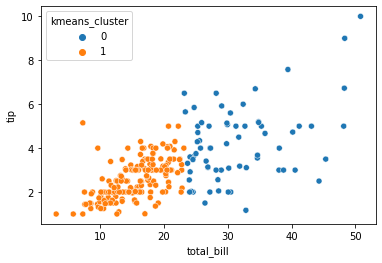

In [87]:
df['kmeans_cluster']=prediction
df['gmm_cluster']=prediction_gmm
sns.scatterplot(data=df,y='tip',x='total_bill',hue='kmeans_cluster')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

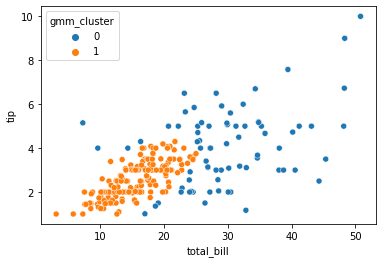

In [88]:
sns.scatterplot(data=df,y='tip',x='total_bill',hue='gmm_cluster')

# multi-variate Gaussian distribution

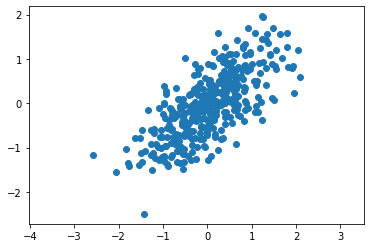

In [103]:
rng=np.random.RandomState(0)
X=rng.randn(2,400)
scale=np.array([[1,0], [0,0.4]])  # Standard deviations are 1 and 0.4
rotate = np.array([[1,-1],[1,1]])/math.sqrt(2)
transform =np.dot(rotate,scale)
X=np.dot(transform,X)
#X=np.dot(scale,X)
#X=np.dot(rotate,X)
X=X.T
pyplot.axis('equal')
pyplot.scatter(X[:,0], X[:,1])

In [104]:
from sklearn.decomposition import PCA
def arrow(v1,v2,ax):
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate("",v2,v1,arrowprops=arrowprops)
pca=PCA(2)
pca.fit(X)
print("Principal axes:", pca.components_)
print("Explained variance:", pca.explained_variance_)
print("Mean:", pca.mean_)

Principal axes: [[-0.73072907 -0.68266758]
 [-0.68266758  0.73072907]]
Explained variance: [0.97980663 0.16031015]
Mean: [ 0.01333067 -0.05370929]


# Test computational complexity of calculating the Normal Equation 

In [10]:
import time

def test_comp(x):
    start = time.time()
    X = 2*np.random.rand(x,1)
    y=4+3*X + np.random.randn(x,1)
    
    X_b = np.c_[np.ones((x,1)),X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    end = time.time()
    
    the_time=end-start
    
    return the_time

In [11]:
test_comp(1000)

0.0010161399841308594

# Pandas

In [3]:
a=[1,7,2]
myvar=pd.Series(a)
print(myvar)

0    1
1    7
2    2
dtype: int64


In [5]:
print(myvar[1])

7


In [6]:
b=[5,8,4]
myvar=pd.Series(a,index=["x","y","z"])
print(myvar)

x    1
y    7
z    2
dtype: int64


In [8]:
print(myvar["y"])

7


In [9]:
calories ={"day1":420,"day2":540,"day3":390}
myvar=pd.Series(calories)
print(myvar)

day1    420
day2    540
day3    390
dtype: int64


In [10]:
calories ={"day1":420,"day2":540,"day3":390}
myvar=pd.Series(calories,index=["day1","day2"])
print(myvar)

day1    420
day2    540
dtype: int64


# Creating DataFrame from two Series

In [23]:
data = {                           
    "calories":[420,540,750],
    "duration":[50,40,45]
}
df = pd.DataFrame(data,index=["day1","day2","day3"])
df.head()

,calories,duration
day1,420,50
day2,540,40
day3,750,45


In [25]:
print(df.loc["day1"])  #return one specified row(s) from dataframe

calories    420
duration     50
Name: day1, dtype: int64


In [28]:
print(df.loc[["day1","day3"]]) #print(df.loc["day1":"day3"]) print from day1 to day3

      calories  duration
day1       420        50
day3       750        45


In [32]:
df=pd.read_csv('data/CancerSEEK_comb.csv')
print(df)

          Sample ID # Patient ID #  Tumor type AJCC Stage  \
0       CRC 455 PLS 1      CRC 455  Colorectum          I   
1       CRC 456 PLS 1      CRC 456  Colorectum          I   
2       CRC 457 PLS 1      CRC 457  Colorectum         II   
3       CRC 458 PLS 1      CRC 458  Colorectum         II   
4       CRC 459 PLS 1      CRC 459  Colorectum         II   
...               ...          ...         ...        ...   
1798  PAPA 1353 PLS 1    PAPA 1353       Ovary          I   
1799  PAPA 1354 PLS 1    PAPA 1354       Ovary          I   
1800  PAPA 1355 PLS 1    PAPA 1355       Ovary        III   
1801  PAPA 1356 PLS 1    PAPA 1356       Ovary         II   
1802  PAPA 1357 PLS 1    PAPA 1357       Ovary        III   

      CancerSEEK Logistic Regression Score CancerSEEK Test Result  lc_cnt  \
0                                    0.938               Positive       8   
1                                    0.925               Positive       5   
2                                   

In [30]:
df.head()

,Sample ID #,Patient ID #,Tumor type,AJCC Stage,CancerSEEK Logistic Regression Score,CancerSEEK Test Result,lc_cnt,uc_cnt,Age,Gender,...,Prolactin,sEGFR,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2
0,CRC 455 PLS 1,CRC 455,Colorectum,I,0.938,Positive,8,0,60.0,Male,...,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,CRC 456 PLS 1,CRC 456,Colorectum,I,0.925,Positive,5,0,59.0,Female,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,CRC 457 PLS 1,CRC 457,Colorectum,II,0.852,Negative,6,0,69.0,Female,...,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60
3,CRC 458 PLS 1,CRC 458,Colorectum,II,0.618,Negative,6,0,70.0,Female,...,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73
4,CRC 459 PLS 1,CRC 459,Colorectum,II,0.318,Negative,10,0,43.0,Female,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20


# OpenCV Computer vision

In [5]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 

In [25]:
cb_image = cv2.imread("data/01_Getting_Started_with_Images/checkerboard_18x18.png",0)

print(cb_image)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [28]:
print("Image size is ", cb_image.shape)

print("Data type of image is ", cb_image.dtype)

Image size is  (18, 18)
Data type of image is  uint8


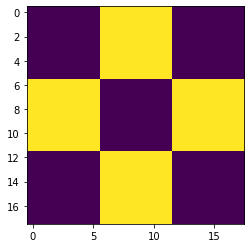

In [29]:
plt.imshow(cb_image)

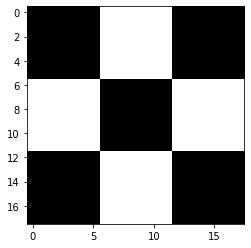

In [34]:
plt.imshow(cb_image,cmap='gray')

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

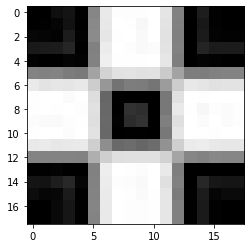

In [36]:
cb_image_fuzzy = cv2.imread("data/01_Getting_Started_with_Images/checkerboard_fuzzy_18x18.jpg",0)
print(cb_image_fuzzy)
plt.imshow(cb_image_fuzzy,cmap='gray')

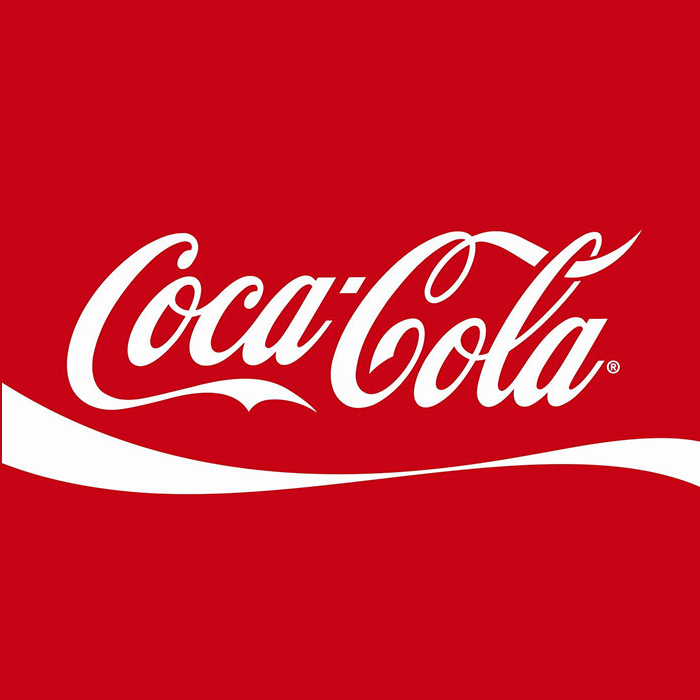

In [37]:
Image("data/01_Getting_Started_with_Images/coca-cola-logo.png")

In [41]:
coke_image=cv2.imread("data/01_Getting_Started_with_Images/coca-cola-logo.png",1)
print("Image size is ", coke_image.shape)
print("Data type of image is ", coke_image.dtype)

Image size is  (700, 700, 3)
Data type of image is  uint8


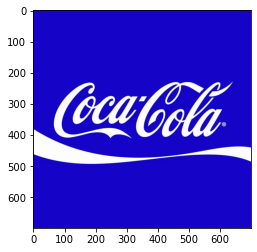

In [42]:
plt.imshow(coke_image)

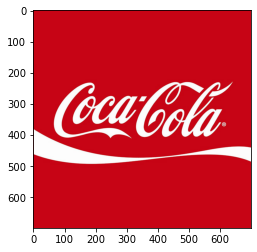

In [44]:
coke_image_channels_reversed = coke_image[:,:,::-1]
plt.imshow(coke_image_channels_reversed)

# Pooling Layers for Convolutional Neural Networks

In [21]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
data = [[0, 0, 0, 1, 1, 0, 0, 0],\
        [0, 0, 0, 1, 1, 0, 0, 0],\
        [0, 0, 0, 1, 1, 0, 0, 0],\
        [0, 0, 0, 1, 1, 0, 0, 0],\
        [0, 0, 0, 1, 1, 0, 0, 0],\
        [0, 0, 0, 1, 1, 0, 0, 0],\
        [0, 0, 0, 1, 1, 0, 0, 0],\
        [0, 0, 0, 1, 1, 0, 0, 0]]
data = np.asarray(data)
data = data.reshape(1, 8, 8, 1)
#create model
model=Sequential()
model.add(Conv2D(1,(3,3),activation='relu',input_shape=(8,8,1)))
model.summary()
detector=[[[[0]],[[1]],[[0]]],\
         [[[0]],[[1]],[[0]]],\
          [[[0]],[[1]],[[0]]]]
weights=[asarray(detector),asarray([0.0])]
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0]for c in range(yhat.shape[2])])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 6, 6, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
